<h1>UK Road Accidents</h1>
<hr>
<h3>Data: Ken Lloyd Alcoreza</h3>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

data = pd.read_csv('dataset\\uk_road_accident.csv')

In [2]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst = True, errors = 'coerce')

data.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [6]:
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month
data['Day'] = data['Accident Date'].dt.day
data['DayOfWeek'] = data['Accident Date'].dt.dayofweek
data.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                  395672
dtype: int64

In [7]:
data['Accident Date'] = data['Accident Date'].fillna('Unaccounted')
data['Year'] = data['Year'].fillna(data['Year'].mode()[0])
data['Day'] = data['Day'].fillna(data['Day'].mode()[0])
data['Month'] = data['Month'].fillna(data['Month'].mode()[0])
data['DayOfWeek'] = data['DayOfWeek'].fillna(data['DayOfWeek'].mode()[0])
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0])
data['Road_Type'] = data['Road_Type'].fillna(data['Road_Type'].mode()[0])
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Weather_Conditions'] = data['Weather_Conditions'].fillna('Unaccounted')


data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Questions</h1>

<h1>1.How many Fatal Accidents has happened in Aberdeen City?</h1>

In [8]:
fatal = data['Accident_Severity'] == 'Fatal'
Aberdeen = data['District Area'] == 'Aberdeen City'
f_c_count = (fatal & Aberdeen).sum()
print(f_c_count)

12


<h1>Insight:</h1>
<h2>There have been 12 fatal accidents in Aberdeen City.</h2>



<h1>2. Which District area has the most Fatal Accidents?</h1>

In [9]:
fatal = data['Accident_Severity'] == 'Fatal'
fatal_counts = data[fatal]['District Area'].value_counts()
top_district = fatal_counts.index[0]
top_count = fatal_counts.values[0]
print(top_district)
print(top_count)

Birmingham
105


<h1>Insight:</h1>
<h2>Birmingham has the highest number of fatal accidents with 105 cases.</h2>


<h1>3. How many district are in this dataset?</h1>

In [10]:
data['District Area'].value_counts().count()


np.int64(422)

<h1>Insight:</h1>
<h2>There are 422 districts included in this dataset.</h2>


<h1>4. What road type has the most accidents?</h1>

In [11]:
data['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h1>Insight:</h1>
<h2>Single carriageway has the most accidents with 496,663 cases, making it the most common road type for accidents.</h2>
<h2>Dual carriageway is a distant second with 99,424 accidents, showing a much lower rate than single carriageways.</h2>
<h2>Slip roads have the fewest accidents at only 7,041 cases, indicating they are relatively safer compared to other road types.</h2>


<h1>5. In the rural, how many fatalities are in the data?</h1>

In [12]:
rural = data['Urban_or_Rural_Area'] == 'Rural'
fatal = data['Accident_Severity'] == 'Fatal'
r_f = (rural & fatal).sum()
print(r_f)

5601


<h1>6. Which vehicle has the highest fatalities?</h1>

In [13]:
fatal = data['Accident_Severity'] == 'Fatal'
fatal_vehicle = data[fatal]['Vehicle_Type'].value_counts()
top_vehicle = fatal_vehicle.index[0]
top_counter = fatal_vehicle.values[0]
print(top_vehicle)
print(top_counter)

Car
6577


<h1>Insight:</h1>
<h2>In rural areas, cars account for 6,577 fatal accidents, making them the most common vehicle type involved in rural fatalities.</h2>


<h1>7. In Aberdeen, how many serious injury has happened during the year 2019?</h1>

In [14]:
london = data['District Area'] ==  'London City'
serious = data['Accident_Severity'] == 'Serious'
year_2019 = data['Year'] == 2019
l_S_2019 = (year_2019 & serious & Aberdeen).sum()
print(l_S_2019)


162


<h1>Insight:</h1>
<h2>In 2019, Aberdeen recorded 162 serious injury accidents, highlighting a significant safety concern for that year.</h2>


<h1>8.How many accidents had happened in daylight?</h1>

In [15]:
(data['Light_Conditions'] == 'Daylight').sum()

np.int64(484880)

<h1>Insight:</h1>
<h2>There were 484,880 accidents that happened during daylight, showing that most accidents occur in well-lit conditions rather than at night.</h2>


<h1>9.How many car accidents had happened in the year 2019?</h1>

In [16]:
car = data['Vehicle_Type'] == 'Car'
c_2019 = (year_2019 & car).sum()
print(c_2019)

349931


<h1>Insight:</h1>
<h2>There were 349,931 car accidents recorded in the year 2019, showing that cars are a major contributor to overall road accidents that year.</h2>


<h1>10.How many taxi or private car has been in the accidents in the data set</h1>

In [17]:
(data['Vehicle_Type'] =='Taxi/Private hire car').sum()

np.int64(13294)

<h1>Insight:</h1>
<h2>There were 13,294 accidents involving taxis or private hire cars, highlighting their notable presence in road incidents.</h2>


<h1>11. What is the overall average number of vehicles involved in accidents?</h1>

In [18]:
all_vehicle = data['Vehicle_Type'].value_counts().count()
all_vehicle

np.int64(16)

<h1>Insight:</h1>
<h2>The overall average number of vehicles involved in accidents is 16, showing that most accidents typically involve multiple vehicles.</h2>


<h1>12. How many accidents were classified as Fatal, Serious, and Slight?</h1>

In [19]:
slight = data['Accident_Severity'] == 'Slight'
print("Fatal =" , fatal.sum())
print("Serious =" , serious.sum())
print("Slight =" ,slight.sum())

Fatal = 8661
Serious = 88217
Slight = 563801


<h1>Insight:</h1>
<h2>There were 8,661 accidents classified as Fatal, which is the least common severity level.</h2>
<h2>Serious accidents numbered 88,217, indicating a significant portion of high-impact crashes.</h2>
<h2>Slight accidents were the most frequent with 563,801 cases, showing that most reported accidents result in minor injuries.</h2>


<h1>13. Which vehicle has the most fatalities?</h1>

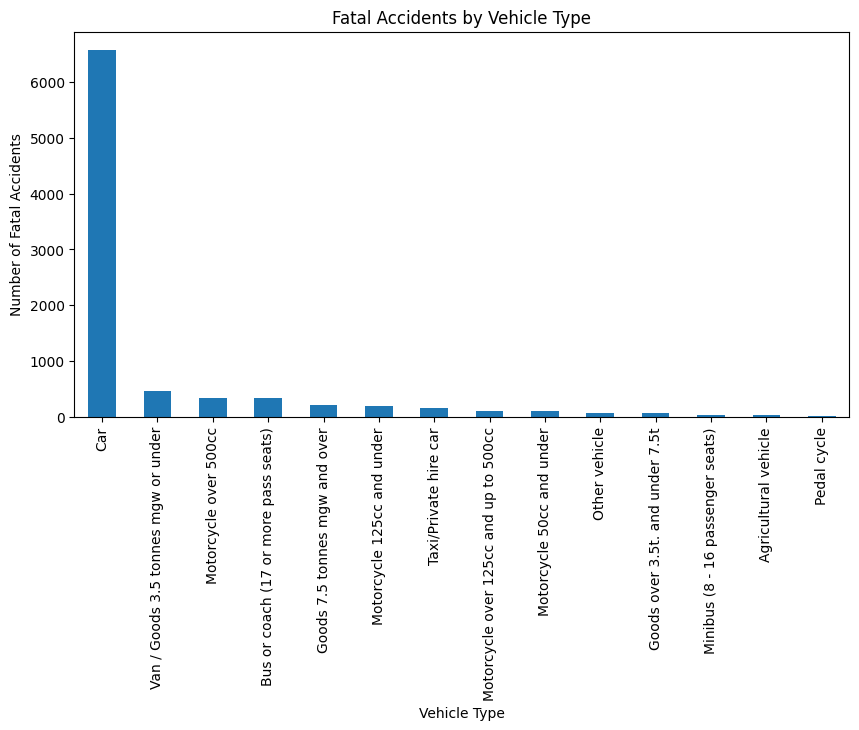

In [20]:
fatal_data = data[data['Accident_Severity'] == 'Fatal']

# Group by vehicle type and count how many fatal accidents each has
fatalities_by_vehicle = fatal_data['Vehicle_Type'].value_counts()

# Plot
fatalities_by_vehicle.plot(kind='bar', figsize=(10,5))

plt.title("Fatal Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Fatal Accidents")
plt.show()

<h1>Insight:</h1>
<h2>Car has the highest number of fatal accidents, making it the most involved vehicle type in fatal crashes.</h2>


<h1>14. Which road surface condition has the most accidents?</h1>

In [21]:
data['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice',
       'Flood over 3cm. deep'], dtype=object)

In [22]:
dry = data['Road_Surface_Conditions'] == 'Dry'
wet_d= data['Road_Surface_Conditions'] == 'Wet or damp'
snow = data['Road_Surface_Conditions'] == 'Snow'
frost_ice = data['Road_Surface_Conditions'] == 'Frost or ice'
flood = data['Road_Surface_Conditions'] == 'Flood over 3cm. deep'

print("Dry = ",dry.sum())
print("Wet or damp = ",wet_d.sum())
print("Snow = ",snow.sum())
print("Frost or ice = ",frost_ice.sum())
print("Flood over 3cm. deep = ",flood.sum())

Dry =  448547
Wet or damp =  186708
Snow =  5890
Frost or ice =  18517
Flood over 3cm. deep =  1017


<h1>Insight:</h1>
<h2>Dry road surfaces have the most accidents with 448,547 cases, showing that most crashes occur in normal driving conditions.</h2>
<h2>Flooded roads have the fewest accidents at only 1,017 cases, likely because drivers avoid these roads during hazardous conditions.</h2>


<h1>15. Which road type (single carriageway, dual carriageway, etc.) has the most accidents?</h1>

In [23]:
data['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road'], dtype=object)

In [24]:
single_carr = data['Road_Type'] == 'Single carriageway'
dual_carr = data['Road_Type'] == 'Dual carriageway'
One_w_street = data['Road_Type'] == 'One way street'
roundabout = data['Road_Type'] == 'Roundabout'
slip_road = data['Road_Type'] == 'Slip road'

print("Single carriageway = ",single_carr.sum())
print("Dual carriageway  = ",dual_carr.sum())
print("One way street = ",One_w_street.sum())
print("Roundabout = ",roundabout.sum())
print("Slip road = ",slip_road.sum())

Single carriageway =  496663
Dual carriageway  =  99424
One way street =  13559
Roundabout =  43992
Slip road =  7041


<h1>Insight:</h1>
<h2>Single carriageways have the highest number of accidents with 496,663 cases, making them the most accident-prone road type.</h2>
<h2>Slip roads have the fewest accidents at only 7,041 cases, showing they are relatively safer compared to other road types.</h2>


<h1>16.In which year did most accidents occur? </h1>

In [25]:
data['Year'].unique()

array([2019., 2020., 2021., 2022.])

In [26]:
y_2019 = data['Year'] == 2019
y_2020 = data['Year'] == 2020
y_2021 = data['Year'] == 2021
y_2022 = data['Year'] == 2022

print("Year 2019 =", y_2019.sum())
print("Year 2020 =", y_2020.sum())
print("Year 2021 =", y_2021.sum())
print("Year 2022 =", y_2022.sum())

Year 2019 = 467539
Year 2020 = 70163
Year 2021 = 66172
Year 2022 = 56805


<h1>Insight:</h1>
<h2>The year 2019 had the highest number of accidents with 467,539 cases, significantly higher than the following years.</h2>
<h2>Accidents steadily decreased from 2020 to 2022, which may indicate improved road safety or reduced travel during these years.</h2>


<h1>17. Is there a correlation between number of vehicles and number of casualties</h1>

In [27]:
data['Number_of_Vehicles'].corr(data['Number_of_Casualties'])

np.float64(0.22888886126927557)

<h1>Insight:</h1>  
<h2>There is a weak positive correlation (0.23) between the number of vehicles and the number of casualties, meaning more vehicles slightly increase the chance of more people getting hurt.</h2>  
<h2>This suggests that multi-vehicle accidents tend to involve more casualties, but the relationship is not very strong.</h2>

<h1>18. How many car accidents happened during rainy weather in Aberdeen on the year 2020?</h1>

In [28]:
data['Weather_Conditions'].unique()

array(['Fine no high winds', 'Raining no high winds', 'Unaccounted',
       'Other', 'Fine + high winds', 'Raining + high winds',
       'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [29]:
raining = data['Weather_Conditions'] == 'Raining no high winds'
raining_wind = data['Weather_Conditions'] == 'Raining + high winds'

rain = (raining & car &Aberdeen & y_2020).sum()
rainier = (raining_wind & car & Aberdeen & y_2020).sum()

print("Rain and no wind =", rain)
print("Rain and wind =", rainier)

Rain and no wind = 23
Rain and wind = 5


<h1>Insight:</h1>  
<h2>The data show two data, a rain without wind and rain with wind accidents from the year 2020 in Aberdeen</h2>  


<h1>19.How does the correlation between vehicles and casualties differ in urban vs rural areas?</h1>

In [30]:
urban_corr = data[data['Urban_or_Rural_Area'] == 'Urban']['Number_of_Vehicles'].corr(data[data['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'])
rural_corr = data[data['Urban_or_Rural_Area'] == 'Rural']['Number_of_Vehicles'].corr(data[data['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties'])

print(f"Urban correlation: {urban_corr}")
print(f"Rural correlation: {rural_corr}")

Urban correlation: 0.2176153598713953
Rural correlation: 0.23607811844076115


<h1>Insight:</h1>  
<h2>In both urban and rural areas, more vehicles tend to lead to more casualties, but the relationship is slightly stronger in rural areas (0.24 vs 0.22).</h2>  
<h2>This suggests that rural accidents involving multiple vehicles may be more dangerous, possibly due to higher speeds or less immediate medical response.</h2>

<h1>20. Which vehicle type is most often involved in accidents?</h1>

In [31]:
data['Vehicle_Type'].unique()

array(['Car', 'Taxi/Private hire car',
       'Bus or coach (17 or more pass seats)', 'Other vehicle',
       'Van / Goods 3.5 tonnes mgw or under',
       'Motorcycle over 125cc and up to 500cc',
       'Goods 7.5 tonnes mgw and over', 'Motorcycle 125cc and under',
       'Motorcycle over 500cc', 'Motorcycle 50cc and under',
       'Minibus (8 - 16 passenger seats)',
       'Goods over 3.5t. and under 7.5t', 'Pedal cycle',
       'Agricultural vehicle', 'Ridden horse',
       'Data missing or out of range'], dtype=object)

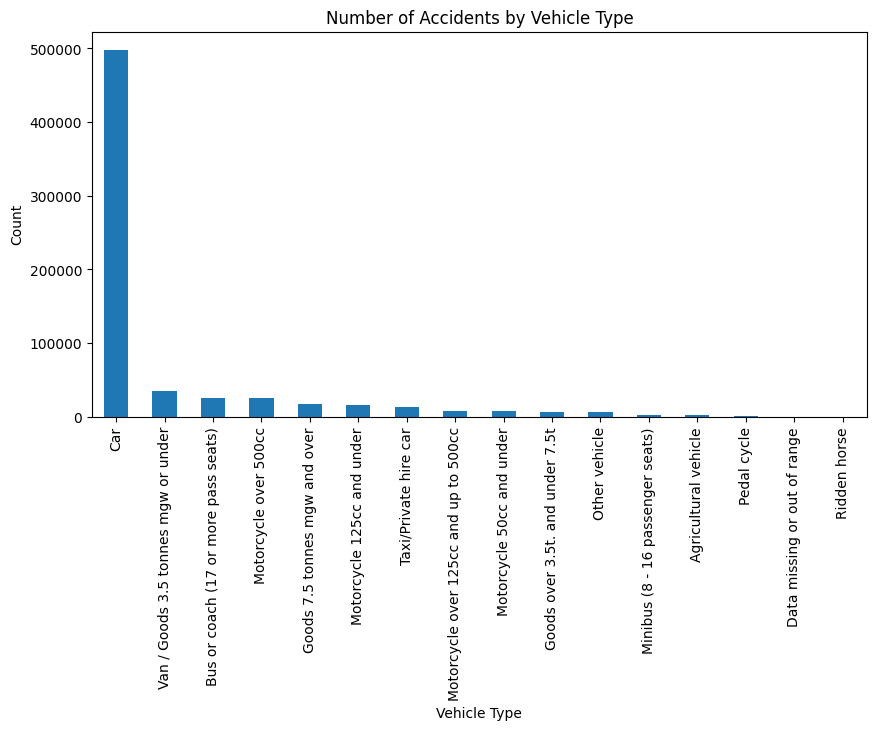

In [32]:
vehicle_counts = data['Vehicle_Type'].value_counts()
vehicle_counts.plot(kind='bar', figsize=(10,5))

plt.title("Number of Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")

plt.show()

<h1>Insight:</h1>  
<h2>Cars are the most frequently involved vehicle type in accidents, showing their dominant presence on the roads.</h2>  
<h2>Vans rank second, indicating that light commercial vehicles also contribute significantly to road incidents.</h2>

In [33]:
horse = data['Vehicle_Type']== 'Ridden horse'
horse.value_counts()

Vehicle_Type
False    660675
True          4
Name: count, dtype: int64

<h1>Insight:</h1>  
<h2>Having this data makes me realize that it might be impossible to have a accident on a Ridden horse but data shows its low but not zero.</h2>  


In [34]:
import folium
from folium.plugins import HeatMap
islington = data[data['District Area'] == 'Islington']
isling_loc = list(zip(islington['Latitude'], islington['Longitude']))
isling_map = folium.Map(location=[islington['Latitude'].mean(), islington['Longitude'].mean()], zoom_start=10)
HeatMap(isling_loc).add_to(isling_map)
isling_map.save('isling_heatmap.html')
isling_map

<h1>Insight</h1>
<h2>Base on the HeatMap in Islington shows a various Accidents, the heatmap shows the visual representation of accidents and it shows that their are too many accident near Victoria Tavern in Islington</h2>

<h1>Insight</h1>
<h2>One of the Accidents happened near Victoria Tavern on LiverPool Road November 30, 2022,Elderly woman struck near junction of Liverpool Road and Richmond Avenue </h2>


<h1>Insight</h1>
<h2>Outside Shu La La / Pera Schnitzel Garden, Upper Street, Islington, A three-vehicle collision resulted in one car mounting the pavement and crashing into the café’s outdoor seating area</h2>


<h1>Insight</h1>
<h2>Near Moonlight Supermarket, Holloway Road, just a short walk from Liverpool Road, A woman was found unresponsive on the pavement</h2>


<h1>Insight</h1>
<h2>On July 2021, Cyclist hit by van near Victoria Tavern causing serious leg injury, taken to Royal London Hospital</h2>


In [35]:
preston = data[data['District Area'] == 'Preston']
preston_loc = list(zip(preston['Latitude'], preston['Longitude']))
preston_map = folium.Map(location=[preston['Latitude'].mean(), preston['Longitude'].mean()], zoom_start=10)
HeatMap(preston_loc).add_to(preston_map)
preston_map.save('preston_heatmap.html')
preston_map

<h1>Insight</h1>
<h2>The accidents in Preston as shown in the HeatMap is alittle bit less than islington</h2>

<h1>Insight</h1>
<h2>One accident is a Cyclist hit by van near Victoria Tavern, serious leg injury, taken to Royal London Hospital</h2>

<h1>Insight</h1>
<h2>Volkswagen driver seriously injured in Preston crash which closed Edith Rigby Way for 4 hours last night</h2>

<h1>Insight</h1>
<h2>Ringway disruption as bus and car involved in crash</h2>

<h1>Insight</h1>
<h2>Major Preston road closed by cops after serious crash</h2>

<h1>Insight</h1>
<h2>Westbound exit slip at junction J2 </h2>